<a href="https://colab.research.google.com/github/Anisafi/UASJST/blob/main/skema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [15]:
# Melakukan import library-library yang dibutuhkan oleh program
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Mengimpor dataset dengan format CSV
df=pd.read_csv("/content/drive/MyDrive/uas_jst/kelompok 5/dataset covid 2/dataCovid.csv")

# Mencetak jumlah baris dan kolom serta menampilkan sampel data
print('Number of rows and columns:', df.shape)
df

Number of rows and columns: (287, 3)


,Tanggal,Jumlah positif,Positif harian
0,29/02/2020,0,0
1,01/03/2020,0,0
2,02/03/2020,0,0
3,03/03/2020,3,3
4,04/03/2020,3,0
...,...,...,...
282,07/12/2020,146601,1174
283,08/12/2020,147838,1237
284,09/12/2020,149018,1180
285,10/12/2020,150250,1232


In [16]:
# Menentukan data Covid-19 untuk training sejumlah 201 baris dan mengambil kolom positif harian
training_set = df.iloc[:201, 2:3].values

In [17]:
# Proses feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Membuat prediksi dengan 30 time-steps
X_train = []
y_train = []
for i in range(60, 201):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Mulai melakukan pemrosesan RNN
model = Sequential()
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(SimpleRNN(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(SimpleRNN(units = 20, return_sequences = True))
model.add(Dropout(0.2))
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(SimpleRNN(units = 20, return_sequences = True))
model.add(Dropout(0.2))
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(SimpleRNN(units = 20))
model.add(Dropout(0.2))
# Menambahkan output layer
model.add(Dense(units = 1))
# Melihat rancangan RNN kita
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 60, 20)              │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 60, 20)              │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 60, 20)              │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,921 (11.41 KB)

 Trainable params: 2,921 (11.41 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Melakukan compile RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Menjalankan RNN ke Training set
history = model.fit(X_train, y_train, epochs = 500, batch_size = 32)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 812ms/step - loss: 0.7002
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.5952
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5097
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3639
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3412
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4555
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3111
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3858
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2408
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2737
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3291
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3190
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2247
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2206
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2027
Epoch 16/500
5/5 

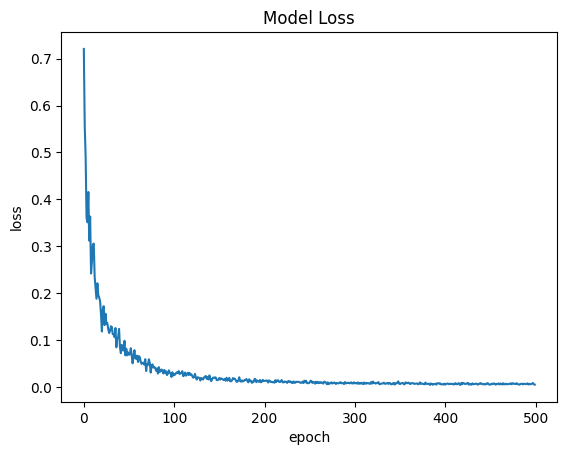

In [20]:
# Menampilkan grafik Model Loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [21]:
# Menentukan data Covid-19 untuk test menggunakan sisa data
dataset_train = df.iloc[:201, 2:3]
dataset_test = df.iloc[201:, 2:3]

# Melakukan prediksi kasus Covid-19
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 116):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(dataset_test.values.shape)

(86, 1)


In [22]:
prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)
print(prediction.astype(int))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
[[1145]
 [1151]
 [1276]
 [1075]
 [1124]
 [1122]
 [1071]
 [1180]
 [1150]
 [1119]
 [1045]
 [1157]
 [1154]
 [ 977]
 [1084]
 [1156]
 [1186]
 [ 986]
 [ 986]
 [1017]
 [1004]
 [1108]
 [1114]
 [1071]
 [ 907]
 [ 974]
 [1056]
 [1102]
 [1240]
 [1173]
 [1077]
 [ 879]
 [1000]
 [1016]
 [1028]
 [1058]
 [1006]
 [ 921]
 [ 809]
 [ 888]
 [ 938]
 [ 937]
 [ 930]
 [ 813]
 [ 760]
 [ 623]
 [ 718]
 [ 832]
 [ 836]
 [ 805]
 [ 847]
 [ 885]
 [ 877]
 [ 897]
 [ 915]
 [ 886]
 [ 925]
 [ 931]
 [ 938]
 [ 843]
 [ 895]
 [1031]
 [1062]
 [1081]
 [1089]
 [1052]
 [ 979]
 [1070]
 [1168]
 [1126]
 [1154]
 [1163]
 [1124]
 [1084]
 [1164]
 [1237]
 [1163]
 [1162]
 [1165]
 [1134]
 [1055]
 [1155]
 [1163]
 [1143]
 [1119]
 [1203]]


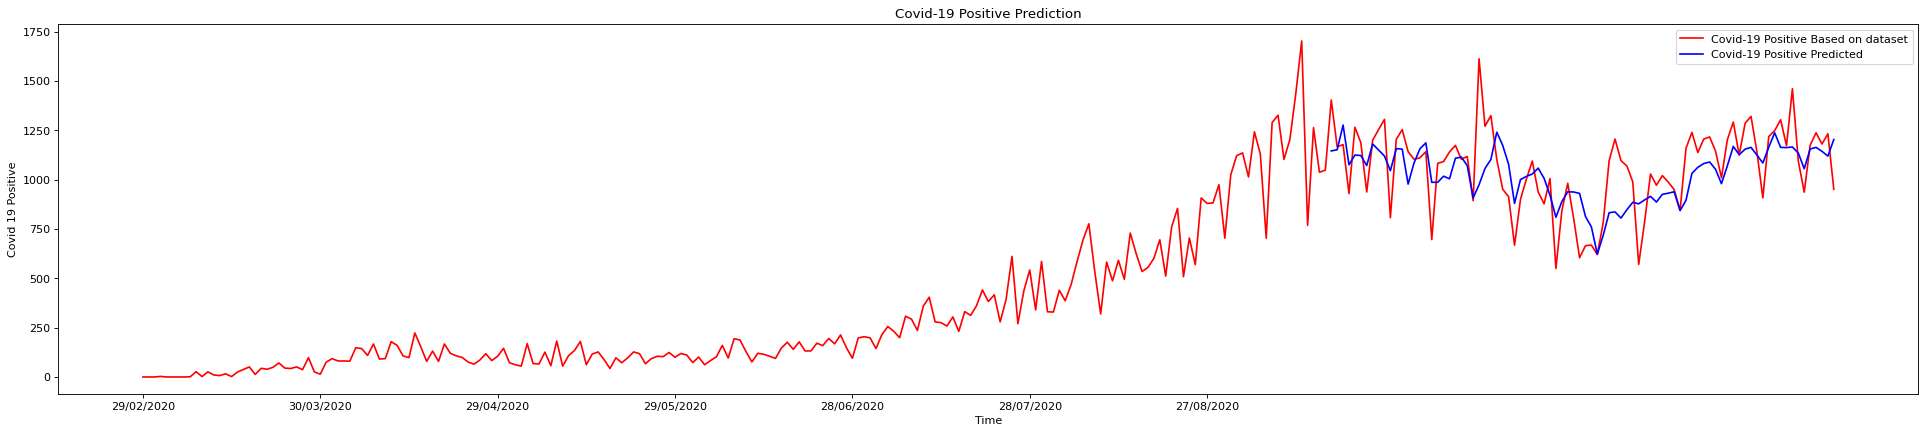

In [23]:
# Visualisasi perbandingan hasil prediksi dan data sesunguhnya
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.loc[:, 'Tanggal'],dataset_total.values, color = 'red', label = 'Covid-19 Positive Based on dataset')
plt.plot(df.loc[201:, 'Tanggal'],prediction.astype(int), color = 'blue', label = 'Covid-19 Positive Predicted')
plt.xticks(np.arange(0,201,30))
plt.title('Covid-19 Positive Prediction')
plt.xlabel('Time')
plt.ylabel('Covid 19 Positive')
plt.legend()
plt.show()

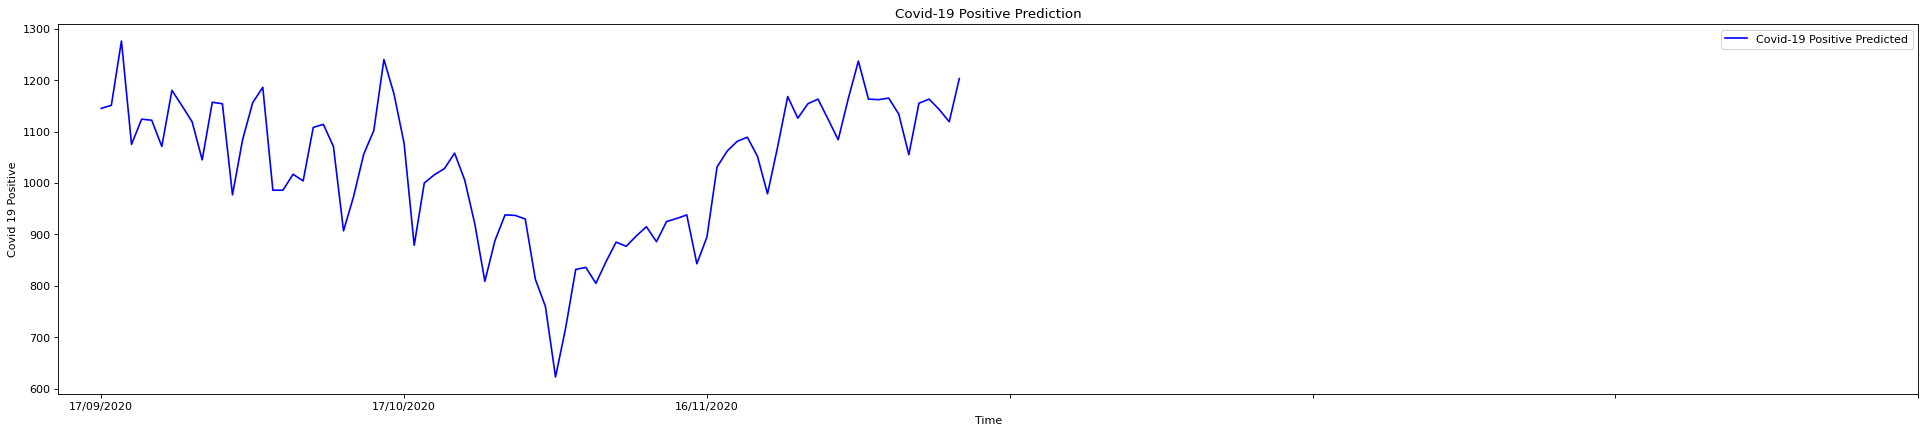

In [24]:
# Visualisasi perbandingan hasil prediksi dan data sesunguhnya
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.loc[201:, 'Tanggal'],prediction.astype(int), color = 'blue', label = 'Covid-19 Positive Predicted')
plt.xticks(np.arange(0,201,30))
plt.title('Covid-19 Positive Prediction')
plt.xlabel('Time')
plt.ylabel('Covid 19 Positive')
plt.legend()
plt.show()